__Задача 1__

Коробки с шоколадом упаковываются автоматически. Их средняя масса равна 1.06 кг. Известно, что 5% коробок имеют массу, меньшую 1 кг. Найдите: а) среднее квадратическое отклонение массы коробки, б) процент коробок, имеющих массу больше 1.1 кг.

_Подсказка_. 1. Можно считать, что распределение массы коробки нормальное. 2. Найдите такое значение `scale`, для которого значение `cdf(x=1, loc=1.06, scale=scale)` близко к 0.05. Точности 0.0001 будет достаточно.

In [1]:
from scipy import stats

In [118]:
scale = 0.1 # Возьмем наугад любое значение scale
while True:
    cdf = stats.norm.cdf(x=1, loc=1.06, scale=scale)
    if round(cdf, 3) < 0.05: #Если cdf < 0.05 то увеличиваем scale 1,5 раза (округлим cdf до 3 знака, такой точности будет достаточно)
        scale += scale*0.5
    elif round(cdf, 3) > 0.05: #Если cdf > 0.05 то уменьшаем scale 1,5 раза
        scale -= scale*0.5
    else:
        print(f'scale = {scale}')
        print(f'rounded scale = {round(scale,4)}')
        print(f'cdf = {cdf}')
        break

scale = 0.03657361206681902
rounded scale = 0.0366
cdf = 0.0504478142044582


In [55]:
stats.norm.cdf(x=1, loc=1.06, scale=0.0366)

0.05057079134840427

__Задача 2__

Коробка содержит 30 конфет. Известно, что масса каждой конфеты распределена равномерно в промежутке от 12 до 14 граммов. Используя центральную предельную теорему, найти вероятность, что масса всей коробки будет: а) меньше 390 граммов, б) больше 395 граммов, в) от 380 до 400 граммов.

Массой самой коробки можно пренебречь.

_Подсказка_. Для равномерного распределения в промежутке `[a, b]`:
1. мат. ожидание равно `(a + b) / 2`,
2. дисперсия равна `(b - a)^2 / 12`.

In [3]:
a = 12
b = 14
# мат. ожидание и дисперсия конфеты 
loc_candy = (a + b) / 2
scale_candy = ((b - a)**2 / 12)**0.5
# мат. ожидание и дисперсия коробки конфет 
loc_box = loc_candy *30
scale_box = scale_candy *30
print(f'loc_candy = {loc_candy}')
print(f'scale_candy = {scale_candy}')
print(f'loc_box = {loc_box}')
print(f'scale_box = {scale_box}')

loc_candy = 13.0
scale_candy = 0.5773502691896257
loc_box = 390.0
scale_box = 17.32050807568877


In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 6]

In [5]:
def pdf_normal(loc: float, scale: float, x: float) -> float:
    """Функция плотности для нормального распределения.
    """
    
    return np.exp(- ((x - loc) ** 2) / (2 * scale ** 2)) / (scale * np.sqrt(2 * np.pi))

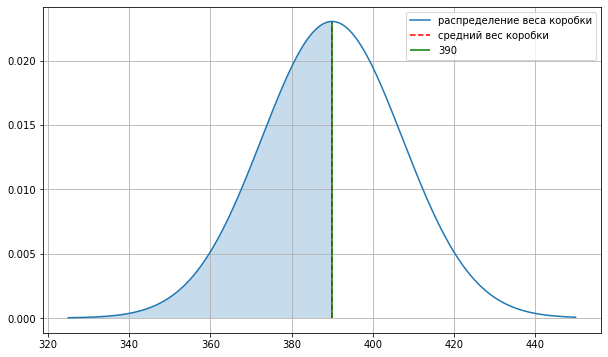

In [6]:
ox = np.linspace(325, 450, 1000)
oy = np.array([pdf_normal(loc_box, scale_box, x) for x in ox])
plt.plot(ox, oy, label = 'распределение веса коробки')
plt.vlines(390, oy.min(), oy.max(), color = 'r',linestyle='dashed', label = 'средний вес коробки')
plt.vlines(390, oy.min(), oy.max(), color = 'g', label = '390')
plt.grid()
plt.legend(loc='upper right')
plt.fill_between(ox, oy, where= ox <=390 , alpha = 0.25)


In [7]:
stats.norm.cdf(x=390, loc=loc_box, scale=scale_box)

0.5

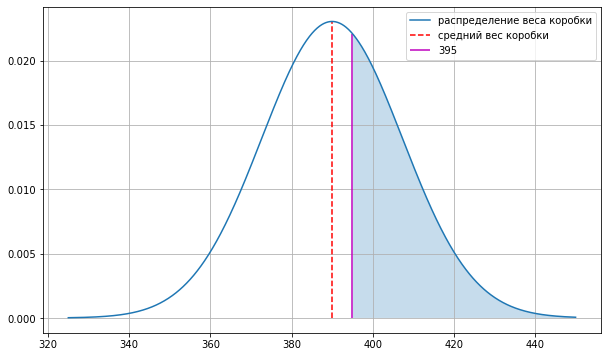

In [8]:
ox = np.linspace(325, 450, 1000)
oy = np.array([pdf_normal(loc_box, scale_box, x) for x in ox])
plt.plot(ox, oy, label = 'распределение веса коробки')
plt.vlines(390, oy.min(), oy.max(), color = 'r',linestyle='dashed', label = 'средний вес коробки')
plt.vlines(395, oy.min(), pdf_normal(loc_box, scale_box, 395), color = 'm', label = '395')
plt.grid()
plt.legend()
plt.fill_between(ox, oy, where= ox >= 395, alpha = 0.25)

In [9]:
1 - stats.norm.cdf(x=395, loc=loc_box, scale=scale_box)

0.38641499634222376

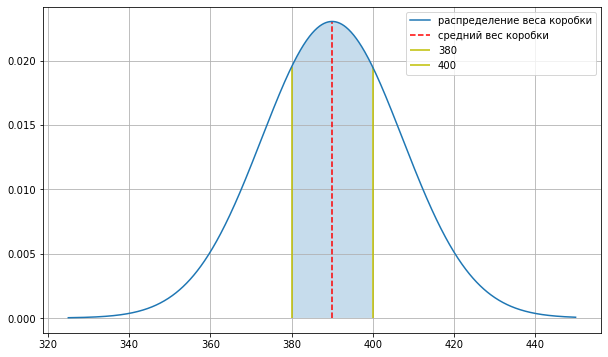

In [10]:
ox = np.linspace(325, 450, 1000)
oy = np.array([pdf_normal(loc_box, scale_box, x) for x in ox])
plt.plot(ox, oy, label = 'распределение веса коробки')
plt.vlines(390, oy.min(), oy.max(), color = 'r',linestyle='dashed', label = 'средний вес коробки')
plt.vlines(380, oy.min(), pdf_normal(loc_box, scale_box, 380), color = 'y', label = '380')
plt.vlines(400, oy.min(), pdf_normal(loc_box, scale_box, 400), color = 'y', label = '400')
plt.fill_between(ox, oy, where=((ox>=380)&(ox<=400)), alpha = 0.25)
plt.grid()
plt.legend()

In [11]:
stats.norm.cdf(x=400, loc=loc_box, scale=scale_box) - stats.norm.cdf(x=380, loc=loc_box, scale=scale_box)

0.4362971383492269

__Задача 3__

Продемонстрируйте действие центральной предельной теоремы на каком-нибудь распределении на ваш выбор (кроме нормального). Что для этого нужно сделать:
1. Выберите несколько значений `n` (например, 2, 5, 10, 50).
2. Для выбранного значения `n` сгенерируйте 1000 раз выборку размера `n` из выбранного вами распределения, посчитайте по этой выборке выборочное среднее.
3. Изобразите гистограмму из полученных 1000 значений выборочного среднего с аргументом `density=True`.
4. Поверх гистограммы нарисуйте функцию плотности нормального распределения с параметрами из ЦПТ (т.е. `mu = M`, `sigma^2 = D / n`, где `M` - мат. ожидание выбранного вами распределения,  `D` - его дисперсия).

При достаточно большом `n` гистограмма должна соответствовать построенной функции плотности.

In [60]:
def pdf_normal(loc: float, scale: float, x: float) -> float:
    """Функция плотности для нормального распределения.
    """
    return np.exp(- ((x - loc) ** 2) / (2 * scale ** 2)) / (scale * np.sqrt(2 * np.pi))

In [116]:
def clt(n):
    samples_means = [] # список куда будем складывать выборочные средние
    for _ in range(1000):
        samples = np.random.poisson(size=n) # генерируем выборку распределения Пуассона размера n
        samples_means.append(samples.mean())
    loc = np.mean(samples_means) # мат. ожидание
    scale = np.std(samples_means) #среднеквадратичное отклонение
    ox = np.linspace(min(samples_means), max(samples_means), 1000)
    oy = np.array([pdf_normal(loc, scale, x) for x in ox])
    ax.hist(samples_means, density=True, bins = 'auto')
    ax.plot(ox, oy, linestyle='dashed')
    ax.set_title(f'n={n}')
    return ax
    

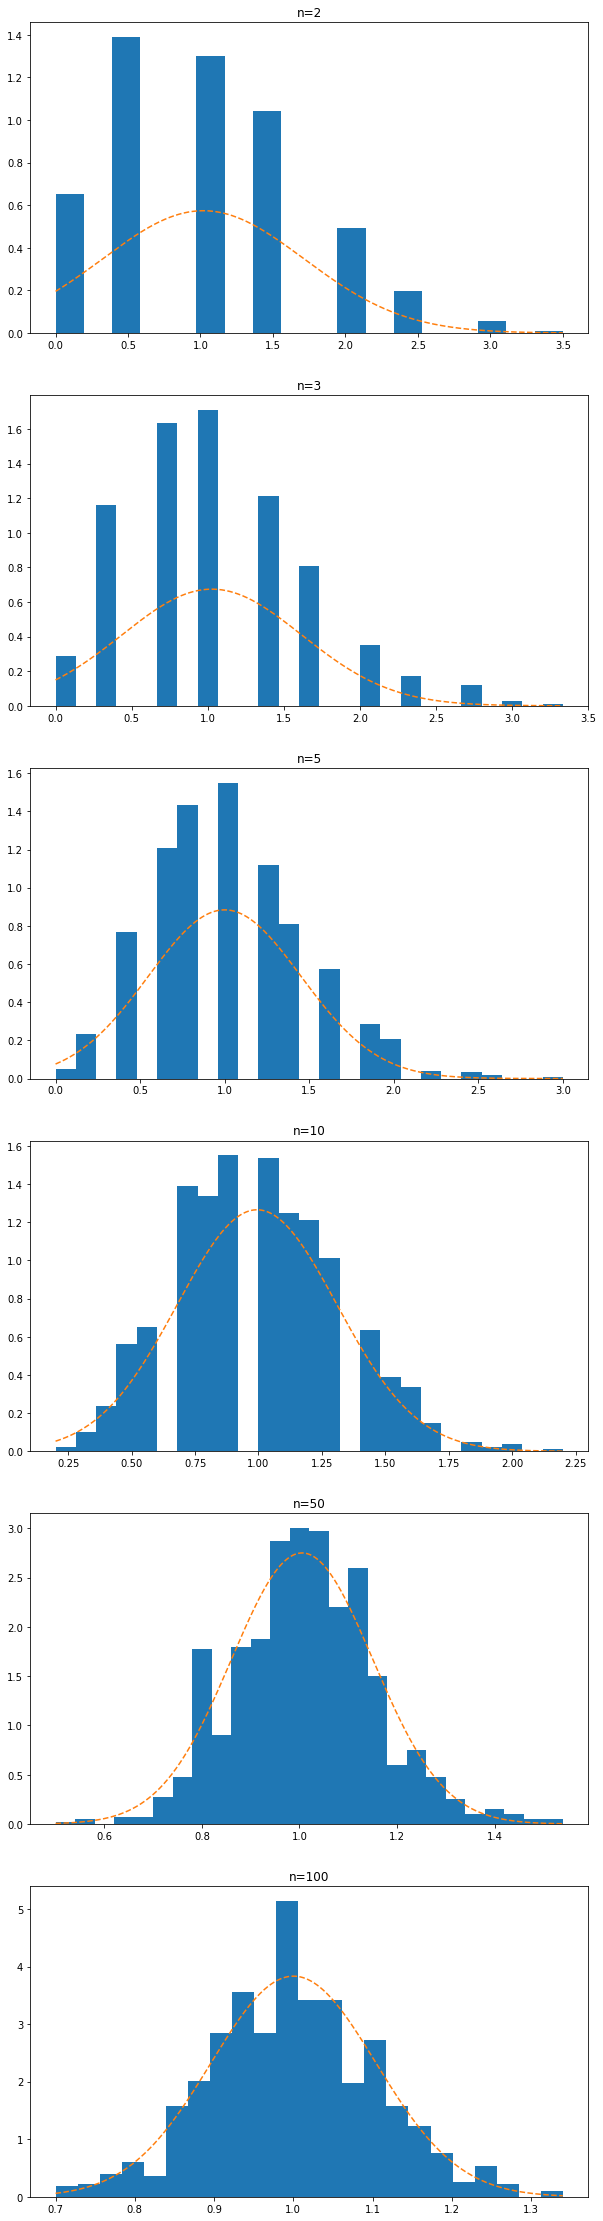

In [117]:
n =  [2,3,5,10,50,100]
fig, axes = plt.subplots(len(n),figsize=(10, 40))
for i, ax in enumerate(axes.flatten()):
    clt(n[i])
